
# Setup of the environment

First, we are setting up our environment. We use an already compiled and 
packaged installation of HOOMD-blue and OpenMM. It is custom and comes with the plugins that are needed for PySAGES for advanced sampling. We copy it from google drive and install pysages for it. We also have a google collab that performs this installation for reference. This is however meant as an explanation of how to install these tools in your own environment.

For your own work, you can use the same environment if you want to work with google colab or install HOOMD-blue with the installation instructions from the [documentation](https://hoomd-blue.readthedocs.io/en/stable/installation.html) and use local Jupyter notebooks or python scripts.


In [1]:
%%bash

BASE_URL="https://drive.google.com/u/0/uc?id=1tyU77ekLDPvmdF4DZSDKz78-MTC3LR6P&export=download"
wget -q --load-cookies /tmp/cookies.txt "$BASE_URL&confirm=$(wget -q --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate $BASE_URL -O- | sed -rn 's/.*confirm=(\w+).*/\1\n/p')" -O pysages-env.zip
rm -rf /tmp/cookies.txt

In [2]:
%env PYSAGES_ENV=/env/pysages

env: PYSAGES_ENV=/env/pysages


In [3]:
%%bash

mkdir -p $PYSAGES_ENV
unzip -qquo pysages-env.zip -d $PYSAGES_ENV

In [4]:
import os
import sys

ver = sys.version_info

sys.path.append(os.environ["PYSAGES_ENV"] + "/lib/python" + str(ver.major) + "." + str(ver.minor) + "/site-packages/")

## Installation of Packmol

We will later use packmol, so we first have to install it. Packmol is free software and can be distributed under the MIT license.

In [5]:
%%bash

wget http://leandro.iqm.unicamp.br/m3g/packmol/packmol.tar.gz
tar -xvzf packmol.tar.gz

./packmol/
./packmol/release.sh
./packmol/packmol.f90
./packmol/jacobi.f90
./packmol/CMakeLists.txt
./packmol/compile_cmake.sh
./packmol/Makefile
./packmol/strlength.f90
./packmol/compute_data.f90
./packmol/output.f90
./packmol/writesuccess.f90
./packmol/gencan.f
./packmol/solvate.tcl
./packmol/getinp.f90
./packmol/setibox.f90
./packmol/.gitignore
./packmol/README.md
./packmol/data_types.f90
./packmol/swaptype.f90
./packmol/pgencan.f90
./packmol/comprest.f90
./packmol/usegencan.f90
./packmol/configure
./packmol/gwalls.f90
./packmol/computeg.f90
./packmol/flashsort.f90
./packmol/comparegrad.f90
./packmol/restmol.f90
./packmol/heuristics.f90
./packmol/polartocart.f90
./packmol/gparc.f90
./packmol/setijk.f90
./packmol/ahestetic.f90
./packmol/fparc.f90
./packmol/cenmass.f90
./packmol/swaptypemod.f90
./packmol/tobar.f90
./packmol/computef.f90
./packmol/setsizes.f90
./packmol/sizes.f90
./packmol/title.f90
./packmol/random.f90
./packmol/LICENSE
./packmol/input.f90
./packmol/checkpoint.f90
./p

--2022-01-30 22:43:15--  http://leandro.iqm.unicamp.br/m3g/packmol/packmol.tar.gz
Resolving leandro.iqm.unicamp.br (leandro.iqm.unicamp.br)... 143.106.51.182
Connecting to leandro.iqm.unicamp.br (leandro.iqm.unicamp.br)|143.106.51.182|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98955 (97K) [application/x-gzip]
Saving to: ‘packmol.tar.gz’

     0K .......... .......... .......... .......... .......... 51%  212K 0s
    50K .......... .......... .......... .......... ......    100% 12.3M=0.2s

2022-01-30 22:43:16 (404 KB/s) - ‘packmol.tar.gz’ saved [98955/98955]



In [6]:
%%bash
cd packmol
mkdir build
cd build
cmake -DCMAKE_INSTALL_PREFIX=../install ..
make install

-- The Fortran compiler identification is GNU 7.5.0
-- Check for working Fortran compiler: /usr/bin/f95
-- Check for working Fortran compiler: /usr/bin/f95  -- works
-- Detecting Fortran compiler ABI info
-- Detecting Fortran compiler ABI info - done
-- Checking whether /usr/bin/f95 supports Fortran 90
-- Checking whether /usr/bin/f95 supports Fortran 90 -- yes
-- Configuring done
-- Generating done
-- Build files have been written to: /content/packmol/build
Scanning dependencies of target packmol
[  2%] Building Fortran object CMakeFiles/packmol.dir/ahestetic.f90.o
[  5%] Building Fortran object CMakeFiles/packmol.dir/sizes.f90.o
[  7%] Building Fortran object CMakeFiles/packmol.dir/compute_data.f90.o
[ 10%] Building Fortran object CMakeFiles/packmol.dir/flashmod.f90.o
[ 13%] Building Fortran object CMakeFiles/packmol.dir/input.f90.o
[ 15%] Building Fortran object CMakeFiles/packmol.dir/swaptypemod.f90.o
[ 18%] Building Fortran object CMakeFiles/packmol.dir/usegencan.f90.o
[ 21%] Buil

f951: Warning: Nonconforming tab character in column 1 of line 2193 [-Wtabs]
/content/packmol/gencan.f:2574:5:

  1003 format(6X,I6,T22,D17.6,T43,D17.6)
     1
/content/packmol/gencan.f:5662:5:

   110 IF (DABS(DX(I)).LE.XMAX) GO TO 115
     1
/content/packmol/gencan.f:5661:5:

    70 IF (DABS(DX(I)).GT.CUTLO) GO TO 75
     1
/content/packmol/gencan.f:5654:5:

    50 IF (DX(I).EQ.ZERO) GO TO 200
     1
/content/packmol/gencan.f:5652:5:

    30 IF (DABS(DX(I)).GT.CUTLO) GO TO 85
     1
/content/packmol/gencan.f:62:37:

       subroutine evalnal(n,x,m,lambda,rho,g,flag)
                                     1
/content/packmol/gencan.f:62:41:

       subroutine evalnal(n,x,m,lambda,rho,g,flag)
                                         1
/content/packmol/gencan.f:2585:40:

      +steabs,epsrel,epsabs,infrel,infabs)
                                        1
/content/packmol/gencan.f:2585:33:

      +steabs,epsrel,epsabs,infrel,infabs)
                                 1
/content/packmol/gencan

In [7]:
%%bash
echo $PATH

/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin


In [8]:
%env PATH=/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin:/content/packmol/install/bin

env: PATH=/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin:/content/packmol/install/bin


## Advanced Hexane simulation

After we explored a system of abstract/coarse-grained nature we are investigating now an all-atom system of [Hexane](https://en.wikipedia.org/wiki/Hexane). Smiles: `CCCCCC`

Previously, we just assumed a force field, now we look into more details of how forcefields can be used to simulate all-atom models of molecules.
In general, since we do not perform ab-initio calculations with all quantum effects, we can only approximate reality. The force fields we are using are usually constructed by averaging from such ab-initio calculations. And later validated by comparison to experiments. These validations usually focus on specific properties that are easily accessible and/or relevant for a specific purpose.

**No matter how you obtain your forcefield: verify it is suitable for your research question!**

Options to obtain a forcefield.


1.   **Use a pre-generated one.** Many molecular dynamics simulations ship with a forcefield that is primarily used in the field they focus on. For example [GROMACS](https://www.gromacs.org/) comes with the [GROMOS](https://doi.org/10.1002/jcc.20090) forcefield for biomolecular applications, [AMBER](http://ambermd.org/) comes with the [GAFF](https://doi.org/10.1002/jcc.20035) forcefield for organic molecules. There is also the optimized potential for liquid simulations ([OPLS](https://doi.org/10.1021/ja9621760)), which we are using in the following. This is usually a good choice if you are interested in properties these forcefields have been designed for.
2.  Find your system in the scientific literature and use the forcefield published there.
3.  ** Adapt one of the forcefields from 1. or 2.** to your application. If you are interested in other properties start with an established forcefield. Find a reference system to verify against (experiment) and adjust the forcefield parameters until you are satisfied.
4.   **Generate your own forcefield**: This approach is common in coarse-grained simulations, where parameters can be obtained from lower level (all-atom, quantum) simulations. And recently more mathematically complex forcefields became popular, which use machine learning to obtain forcefields from ab-initio simulations. Example: [Behler et. al 2021](https://doi.org/10.1140/epjb/s10051-021-00156-1).

For this lecture, we stick with option 1, but it is important to evaluate for each problem the best forcefield possible.

## All-atom simulations with OpenMM

Previously we have used HOOMD-blue for our simulations, however, the focus of HOOMD-blue is more on coarse-grained and abstract models, not all-atom simulations. The [OpenMM](https://openmm.org/) tool is better suited for this application. Similar to HOOMD-blue, OpenMM is also free, open-source software, that uses GPUs for speed and a python front-end for usability.

It is absolutely feasible to do the following steps for HOOMD-blue as well, in particular, exists with MoSDEeF a good initiative find forcefields and initial conditions of high quality. For future projects, this is a good starting point as well.

We are using OpenMM here and use other tools for the same purpose.
For liquid organic molecules, like Hexane, the OPLS forcefield is a good choice.
It is possible to manually check the chemical nature of each atom and assign each atom the corresponding OPLS type. For example, GROMACS ships a [file](https://github.com/gromacs/gromacs/blob/master/share/top/oplsaa.ff/atomtypes.atp) that explains which OPLS type is intended for a large number of common situations. This information can then be used to find the corresponding parameter for the generic OPLS potential. [Here](https://github.com/gromacs/gromacs/blob/master/share/top/oplsaa.ff/ffnonbonded.itp) is a file that lists the LJ parameters for each OPLS type as non-bonded interactions.

This is certainly the most accurate method and probably feasible for small molecules, but can get very tedious for larger simulations.

Instead, we are using here the LigParGen server, which offers a free option to automatically export the forcefield and initial conditions for various simulation engines including OpenMM.
### Files for OpenMM
I have pre-generated the files for OpenMM, so here they are for Hexane with the SMILES of `CCCCCC`.

The PDB data file for one molecule contains initial atom positions. PDB is not the best file format out there, but it is human readable and widely used. Note that CRYST1 was originally used to describe the periodicity of the crystal in X-ray, but for simulations, because of PBC, we can use it to describe the simulation box.

In [9]:
%%bash
echo "HEADER 
TITLE     Built with Packmol                                             
REMARK   Packmol generated pdb file 
REMARK   Home-Page: http://m3g.iqm.unicamp.br/packmol
REMARK
CRYST1    14.00    14.00    14.00  90.00  90.00  90.00 P 1           1
ATOM      1  C01   A Z   1       5.698  12.862   3.069  1.00  0.00           C  
ATOM      2  C02   A Z   1       4.700  11.954   2.339  1.00  0.00           C  
ATOM      3  C03   A Z   1       3.441  12.685   1.838  1.00  0.00           C  
ATOM      4  C04   A Z   1       2.542  13.284   2.938  1.00  0.00           C  
ATOM      5  C05   A Z   1       1.964  12.272   3.944  1.00  0.00           C  
ATOM      6  C06   A Z   1       1.024  11.236   3.314  1.00  0.00           C  
ATOM      7  H07   A Z   1       6.597  12.308   3.341  1.00  0.00           H  
ATOM      8  H08   A Z   1       5.273  13.266   3.989  1.00  0.00           H  
ATOM      9  H09   A Z   1       6.001  13.700   2.440  1.00  0.00           H  
ATOM     10  H10   A Z   1       5.206  11.510   1.480  1.00  0.00           H  
ATOM     11  H11   A Z   1       4.424  11.118   2.981  1.00  0.00           H  
ATOM     12  H12   A Z   1       3.746  13.485   1.163  1.00  0.00           H  
ATOM     13  H13   A Z   1       2.855  12.000   1.225  1.00  0.00           H  
ATOM     14  H14   A Z   1       3.098  14.046   3.483  1.00  0.00           H  
ATOM     15  H15   A Z   1       1.717  13.814   2.462  1.00  0.00           H  
ATOM     16  H16   A Z   1       1.409  12.821   4.704  1.00  0.00           H  
ATOM     17  H17   A Z   1       2.768  11.764   4.477  1.00  0.00           H  
ATOM     18  H18   A Z   1       0.582  10.600   4.081  1.00  0.00           H  
ATOM     19  H19   A Z   1       0.209  11.719   2.774  1.00  0.00           H  
ATOM     20  H20   A Z   1       1.553  10.586   2.617  1.00  0.00           H  
END

"> UNK.pdb

The XML "forcefield" file specifies all the forcefield parameters for OPLS.

In [10]:
%%bash
echo "<?xml version='1.0' encoding='iso-8859-1'?>
<ForceField comment=\"Created by Stage/AcPype\">
  <AtomTypes>
    <Type name=\"AC01\" class=\"CT\" element=\"C\" mass=\"12.011\" />
    <Type name=\"AC02\" class=\"CT\" element=\"C\" mass=\"12.011\" />
    <Type name=\"AC03\" class=\"CT\" element=\"C\" mass=\"12.011\" />
    <Type name=\"AC04\" class=\"CT\" element=\"C\" mass=\"12.011\" />
    <Type name=\"AC05\" class=\"CT\" element=\"C\" mass=\"12.011\" />
    <Type name=\"AC06\" class=\"CT\" element=\"C\" mass=\"12.011\" />
    <Type name=\"AH07\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH08\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH09\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH10\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH11\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH12\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH13\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH14\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH15\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH16\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH17\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH18\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH19\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    <Type name=\"AH20\" class=\"HC\" element=\"H\" mass=\"1.008\" />
    </AtomTypes>
  <Residues>
    <Residue name=\"A\">
      <Atom name=\"C01\" type=\"AC01\" charge=\"0.0\" />
      <Atom name=\"C02\" type=\"AC02\" charge=\"0.0\" />
      <Atom name=\"C03\" type=\"AC03\" charge=\"0.0\" />
      <Atom name=\"C04\" type=\"AC04\" charge=\"0.0\" />
      <Atom name=\"C05\" type=\"AC05\" charge=\"0.0\" />
      <Atom name=\"C06\" type=\"AC06\" charge=\"0.0\" />
      <Atom name=\"H07\" type=\"AH07\" charge=\"0.0\" />
      <Atom name=\"H08\" type=\"AH08\" charge=\"0.0\" />
      <Atom name=\"H09\" type=\"AH09\" charge=\"0.0\" />
      <Atom name=\"H10\" type=\"AH10\" charge=\"0.0\" />
      <Atom name=\"H11\" type=\"AH11\" charge=\"0.0\" />
      <Atom name=\"H12\" type=\"AH12\" charge=\"0.0\" />
      <Atom name=\"H13\" type=\"AH13\" charge=\"0.0\" />
      <Atom name=\"H14\" type=\"AH14\" charge=\"0.0\" />
      <Atom name=\"H15\" type=\"AH15\" charge=\"0.0\" />
      <Atom name=\"H16\" type=\"AH16\" charge=\"0.0\" />
      <Atom name=\"H17\" type=\"AH17\" charge=\"0.0\" />
      <Atom name=\"H18\" type=\"AH18\" charge=\"0.0\" />
      <Atom name=\"H19\" type=\"AH19\" charge=\"0.0\" />
      <Atom name=\"H20\" type=\"AH20\" charge=\"0.0\" />
      <Bond atomName1=\"C01\" atomName2=\"C02\" />
      <Bond atomName1=\"C01\" atomName2=\"H07\" />
      <Bond atomName1=\"C01\" atomName2=\"H08\" />
      <Bond atomName1=\"C01\" atomName2=\"H09\" />
      <Bond atomName1=\"C02\" atomName2=\"C03\" />
      <Bond atomName1=\"C02\" atomName2=\"H10\" />
      <Bond atomName1=\"C02\" atomName2=\"H11\" />
      <Bond atomName1=\"C03\" atomName2=\"C04\" />
      <Bond atomName1=\"C03\" atomName2=\"H12\" />
      <Bond atomName1=\"C03\" atomName2=\"H13\" />
      <Bond atomName1=\"C04\" atomName2=\"C05\" />
      <Bond atomName1=\"C04\" atomName2=\"H14\" />
      <Bond atomName1=\"C04\" atomName2=\"H15\" />
      <Bond atomName1=\"C05\" atomName2=\"C06\" />
      <Bond atomName1=\"C05\" atomName2=\"H16\" />
      <Bond atomName1=\"C05\" atomName2=\"H17\" />
      <Bond atomName1=\"C06\" atomName2=\"H18\" />
      <Bond atomName1=\"C06\" atomName2=\"H19\" />
      <Bond atomName1=\"C06\" atomName2=\"H20\" />
      </Residue>
    </Residues>
  <HarmonicBondForce>
    <Bond class1=\"CT\" class2=\"CT\" length=\"0.1529\" k=\"224262.4\" />
    <Bond class1=\"CT\" class2=\"HC\" length=\"0.109\" k=\"284512.0\" />
    </HarmonicBondForce>
  <HarmonicAngleForce>
    <Angle class1=\"CT\" class2=\"CT\" class3=\"CT\" angle=\"1.9669860669976096\" k=\"488.273\" />
    <Angle class1=\"CT\" class2=\"CT\" class3=\"HC\" angle=\"1.9320794819577227\" k=\"313.8\" />
    <Angle class1=\"HC\" class2=\"CT\" class3=\"HC\" angle=\"1.8814649336498872\" k=\"276.144\" />
    </HarmonicAngleForce>
  <PeriodicTorsionForce>
    <Proper class1=\"CT\" class2=\"CT\" class3=\"CT\" class4=\"CT\" k1=\"2.0919999999999996\" phase1=\"0.0\" periodicity1=\"1\" k2=\"-0.1046\" phase2=\"3.141592653589793\" periodicity2=\"2\" k3=\"0.4184\" phase3=\"0.0\" periodicity3=\"3\" k4=\"-0.0\" phase4=\"3.141592653589793\" periodicity4=\"4\" />
    <Proper class1=\"CT\" class2=\"CT\" class3=\"CT\" class4=\"HC\" k1=\"-0.9414\" phase1=\"0.0\" periodicity1=\"1\" k2=\"-0.0\" phase2=\"3.141592653589793\" periodicity2=\"2\" k3=\"0.6276\" phase3=\"0.0\" periodicity3=\"3\" k4=\"-0.0\" phase4=\"3.141592653589793\" periodicity4=\"4\" />
    <Proper class1=\"HC\" class2=\"CT\" class3=\"CT\" class4=\"CT\" k1=\"-0.9414\" phase1=\"0.0\" periodicity1=\"1\" k2=\"-0.0\" phase2=\"3.141592653589793\" periodicity2=\"2\" k3=\"0.6276\" phase3=\"0.0\" periodicity3=\"3\" k4=\"-0.0\" phase4=\"3.141592653589793\" periodicity4=\"4\" />
    <Proper class1=\"HC\" class2=\"CT\" class3=\"CT\" class4=\"HC\" k1=\"-0.9414\" phase1=\"0.0\" periodicity1=\"1\" k2=\"-0.0\" phase2=\"3.141592653589793\" periodicity2=\"2\" k3=\"0.6276\" phase3=\"0.0\" periodicity3=\"3\" k4=\"-0.0\" phase4=\"3.141592653589793\" periodicity4=\"4\" />
    </PeriodicTorsionForce>
  <NonbondedForce coulomb14scale=\"0.5\" lj14scale=\"0.5\">
    <UseAttributeFromResidue name=\"charge\" />
    <Atom type=\"AC01\" sigma=\"0.35\" epsilon=\"0.276144\" />
    <Atom type=\"AC02\" sigma=\"0.35\" epsilon=\"0.276144\" />
    <Atom type=\"AC03\" sigma=\"0.35\" epsilon=\"0.276144\" />
    <Atom type=\"AC04\" sigma=\"0.35\" epsilon=\"0.276144\" />
    <Atom type=\"AC05\" sigma=\"0.35\" epsilon=\"0.276144\" />
    <Atom type=\"AC06\" sigma=\"0.35\" epsilon=\"0.276144\" />
    <Atom type=\"AH07\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH08\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH09\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH10\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH11\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH12\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH13\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH14\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH15\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH16\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH17\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH18\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH19\" sigma=\"0.25\" epsilon=\"0.12552\" />
    <Atom type=\"AH20\" sigma=\"0.25\" epsilon=\"0.12552\" />
    </NonbondedForce>
  </ForceField>
" > forcefield.xml

head forcefield.xml

<?xml version='1.0' encoding='iso-8859-1'?>
<ForceField comment="Created by Stage/AcPype">
  <AtomTypes>
    <Type name="AC01" class="CT" element="C" mass="12.011" />
    <Type name="AC02" class="CT" element="C" mass="12.011" />
    <Type name="AC03" class="CT" element="C" mass="12.011" />
    <Type name="AC04" class="CT" element="C" mass="12.011" />
    <Type name="AC05" class="CT" element="C" mass="12.011" />
    <Type name="AC06" class="CT" element="C" mass="12.011" />
    <Type name="AH07" class="HC" element="H" mass="1.008" />


While the "residue.xml" file describes the bond connections inside the residues.
Note, that we purposefully do not use the PDB `CONECT` field here.


In [11]:
%%bash
echo "<?xml version='1.0' encoding='iso-8859-1'?>
<Residues>
  <Residue name=\"A\">
    <Bond from=\"C01\" to=\"C02\" />
    <Bond from=\"C01\" to=\"H07\" />
    <Bond from=\"C01\" to=\"H08\" />
    <Bond from=\"C01\" to=\"H09\" />
    <Bond from=\"C02\" to=\"C03\" />
    <Bond from=\"C02\" to=\"H10\" />
    <Bond from=\"C02\" to=\"H11\" />
    <Bond from=\"C03\" to=\"C04\" />
    <Bond from=\"C03\" to=\"H12\" />
    <Bond from=\"C03\" to=\"H13\" />
    <Bond from=\"C04\" to=\"C05\" />
    <Bond from=\"C04\" to=\"H14\" />
    <Bond from=\"C04\" to=\"H15\" />
    <Bond from=\"C05\" to=\"C06\" />
    <Bond from=\"C05\" to=\"H16\" />
    <Bond from=\"C05\" to=\"H17\" />
    <Bond from=\"C06\" to=\"H18\" />
    <Bond from=\"C06\" to=\"H19\" />
    <Bond from=\"C06\" to=\"H20\" />
    </Residue>
  </Residues>
" > residues.xml

### Packing molecules with Packmol

This describes only a single molecule. We are interested in the bulk system here, so we pack many of the molecules into a single box. The previously installed Packmol tool is open-source software designed for exactly this purpose.

It takes this input file to pack a number of these molecules into a simulation box.

In [12]:
%%bash
echo "tolerance 2.0
filetype pdb
output tmp.pdb

structure UNK.pdb
  number 100
  inside box 0. 0. 0. 40. 40. 40.
end structure" > packmol.inp

We use this to pack the molecules with packmol.

In [13]:
%%bash
packmol < packmol.inp
head -n 5 tmp.pdb > bulk.pdb
echo "CRYST1    40.00    40.00    40.00  90.00  90.00  90.00 P 1           1" >> bulk.pdb
grep -v CONECT tmp.pdb | tail -n +6 >> bulk.pdb
tail bulk.pdb
head bulk.pdb


################################################################################

 PACKMOL - Packing optimization for the automated generation of
 starting configurations for molecular dynamics simulations.
 
                                                              Version 20.3.3 

################################################################################

  Packmol must be run with: packmol < inputfile.inp 

  Userguide at: http://m3g.iqm.unicamp.br/packmol 

  Reading input file... (Control-C aborts)
  Seed for random number generator:      1234567
  Output file: tmp.pdb
  Reading coordinate file: UNK.pdb
  Number of independent structures:            1
  The structures are: 
  Structure            1 :UNK.pdb(          20  atoms)
  Maximum number of GENCAN loops for all molecule packing:          200
  Total number of restrictions:            1
  Distance tolerance:    2.0000000000000000     
  Residue numbering set for structure            1 :           0
  Swap chains o

We can download this file and take a look at the initial condition with ovito. The molecules are very loosely packed into the simulation box.

## Simulation with OpenMM


We have all ingredients ready to start the OpenMM simulation. First, we import the tools we need for our simulations.
Note how OpenMM handles units, it relates them to prefixed SI units which are fundamentally different than HOOMD-blue but common for a simulation tool that focuses on all-atom simulations. We are using a Langevin Integrator as a thermostat and a Barostat for NPT simulation, which uses Monte-Carlo moves to adjust the simulation box volume similar to the method discussed in the lecture.

In [14]:
import sys
import simtk
from simtk.openmm.app import PDBFile, ForceField, HBonds, Simulation, StateDataReporter, PME, PDBReporter
from simtk.openmm import LangevinIntegrator, MonteCarloBarostat 
from simtk.unit import kelvin, picosecond, nanometer, bar 

First, we define some of the essential parameters and read initial conditions and forcefield.

In [15]:
delta_t = 0.001
seed = 42
time_steps = int(1e6)
pdb = PDBFile('bulk.pdb')
# We need to add the topology from our residues file
pdb.topology.loadBondDefinitions('residues.xml')
pdb.topology.createStandardBonds()
forcefield = ForceField('forcefield.xml')


In [16]:
import simtk
from simtk.openmm import CustomNonbondedForce

def get_force_by_name(system, force_name):
    """
    A helper function is to extract a force from a system by its name.
    """
    all_forces = {system.getForce(index).__class__.__name__: system.getForce(index) for index in range(system.getNumForces())}
    force = all_forces[force_name]

    return force

def opls_lj(system):
    """
    Setup the correct mixing rules for OPLS simulations with OpenMM.
    """
    nonbonded_force = get_force_by_name(system, 'NonbondedForce')
    lorentz = CustomNonbondedForce('4*epsilon*((sigma/r)^12-(sigma/r)^6); sigma=sqrt(sigma1*sigma2); epsilon=sqrt(epsilon1*epsilon2)')
    lorentz.setNonbondedMethod(CustomNonbondedForce.CutoffPeriodic)
    lorentz.addPerParticleParameter('sigma')
    lorentz.addPerParticleParameter('epsilon')
    lorentz.setCutoffDistance(nonbonded_force.getCutoffDistance())
    system.addForce(lorentz)
    lj_set = {}
    for index in range(nonbonded_force.getNumParticles()):
        charge, sigma, epsilon = nonbonded_force.getParticleParameters(index)
        lj_set[index] = (sigma, epsilon)
        lorentz.addParticle([sigma, epsilon])
        nonbonded_force.setParticleParameters(index, charge, sigma, epsilon * 0)
    for i in range(nonbonded_force.getNumExceptions()):
        (particle1, particle2, charge, sig, eps) = nonbonded_force.getExceptionParameters(i)
        # ALL THE 12,13 and 14 interactions are EXCLUDED FROM CUSTOM NONBONDED
        # FORCE
        lorentz.addExclusion(particle1, particle2)
        if eps._value != 0.0:  # pylint: disable=protected-access
            sig14 = simtk.unit.sqrt(lj_set[particle1][0] * lj_set[particle2][0])
            nonbonded_force.setExceptionParameters(i, particle1, particle2, charge, sig14, eps)
    return system


Next we initialize the OpenMM simulation.

In [17]:
system = forcefield.createSystem(pdb.topology, nonbondedMethod=PME, nonbondedCutoff=1*nanometer, constraints=HBonds)
# We want to specify our own functional form of the non-bonded LJ interactions.
system = opls_lj(system)

integrator = LangevinIntegrator(298.15*kelvin, 1./picosecond, delta_t*picosecond)
integrator.setRandomNumberSeed(seed)

barostat = MonteCarloBarostat(1*bar, 298.15*kelvin)
barostat.setRandomNumberSeed(seed)
# For OpenMM the barostat is like a force, even as we know it is not a real force
barostat_id = system.addForce(barostat)

simulation = Simulation(pdb.topology, system, integrator)
simulation.context.setPositions(pdb.positions)

# observable output
simulation.reporters.append(StateDataReporter('obs.dat', 1000, step=True, potentialEnergy=True, temperature=True, volume=True, density=True))
# store traj.
simulation.reporters.append(PDBReporter('traj.pdb', 10000))
# output to judge the simulation time
simulation.reporters.append(StateDataReporter(sys.stdout, 1000, step=True, remainingTime=True, totalSteps=time_steps))

    

Now we can run the simulation.

In [18]:
simulation.step(time_steps)
simulation.saveState('final.xml')

#"Step","Time Remaining"
1000,--
2000,2:16
3000,2:01
4000,1:53
5000,1:47
6000,1:44
7000,1:43
8000,1:43
9000,1:42
10000,1:44
11000,1:44
12000,1:44
13000,1:45
14000,1:45
15000,1:46
16000,1:46
17000,1:46
18000,1:47
19000,1:47
20000,1:49
21000,1:49
22000,1:49
23000,1:48
24000,1:48
25000,1:48
26000,1:48
27000,1:48
28000,1:48
29000,1:48
30000,1:48
31000,1:48
32000,1:48
33000,1:48
34000,1:48
35000,1:48
36000,1:48
37000,1:48
38000,1:47
39000,1:47
40000,1:48
41000,1:48
42000,1:48
43000,1:48
44000,1:48
45000,1:48
46000,1:48
47000,1:48
48000,1:48
49000,1:48
50000,1:48
51000,1:48
52000,1:48
53000,1:48
54000,1:48
55000,1:48
56000,1:48
57000,1:48
58000,1:48
59000,1:48
60000,1:48
61000,1:48
62000,1:48
63000,1:48
64000,1:47
65000,1:47
66000,1:47
67000,1:47
68000,1:47
69000,1:47
70000,1:47
71000,1:47
72000,1:47
73000,1:47
74000,1:47
75000,1:46
76000,1:46
77000,1:46
78000,1:46
79000,1:46
80000,1:46
81000,1:46
82000,1:46
83000,1:45
84000,1:45
85000,1:45
86000,1:45
87000,1:45
88000,1:45
89000,1:44
90000,1

In [19]:
%%bash
head final.xml
head obs.dat

<?xml version="1.0" ?>
<State openmmVersion="7.6" time="999.9999999832651" type="State" version="1">
	<PeriodicBoxVectors>
		<A x="2.8461946374483476" y="0" z="0"/>
		<B x="0" y="2.8461946374483476" z="0"/>
		<C x="0" y="0" z="2.8461946374483476"/>
	</PeriodicBoxVectors>
	<Parameters MonteCarloPressure="1" MonteCarloTemperature="298.15"/>
	<Positions>
		<Position x="2.3853349685668945" y=".6451311111450195" z=".8792267441749573"/>
#"Step","Potential Energy (kJ/mole)","Temperature (K)","Box Volume (nm^3)","Density (g/mL)"
1000,-561.7575073242188,195.9016005051912,62.492492084642045,0.22899060504273738
2000,737.4402465820312,274.87769712736747,60.57446586170525,0.23624134970932467
3000,826.1923217773438,294.171421632558,56.276209889163255,0.2542849563123525
4000,677.7349853515625,290.4760436434984,55.38639490267246,0.25837019358702074
5000,683.2454223632812,288.5496440313863,49.19691001070005,0.29087586130873405
6000,570.8369750976562,298.9469530674078,46.4750160562004,0.3079115358623203

# Analysis

We know that the density of Hexane should be $0.6606 g/\mathrm{m}L$ so we can try to verify our simulation by comparing it to this experimental value.

But first, we take a look at the equilibration from the rough initial conditions.

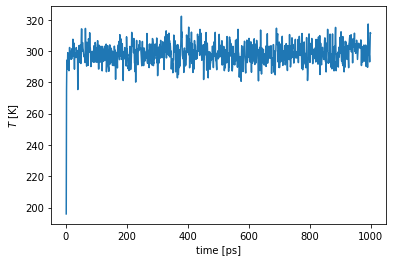

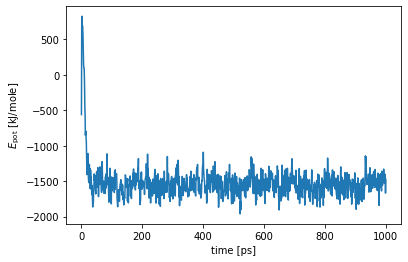

In [20]:
import numpy as np
import matplotlib.pyplot as plt
step, Epot, temp, vol, rho = np.loadtxt("obs.dat", skiprows=1, delimiter=",", unpack=True)

time = step * delta_t

fig, ax = plt.subplots()
ax.set_xlabel(r"time [ps]")
ax.set_ylabel(r"$T$ [K]")
ax.plot(time, temp, label="instantanenous temeprature")

fig, ax = plt.subplots()
ax.set_xlabel(r"time [ps]")
ax.set_ylabel(r"$E_\mathrm{pot}$ [kJ/mole]")
ax.plot(time, Epot, label="potential energy")

These fluctuate initially but settle towards the expected values.
Now let's take a look at the density.


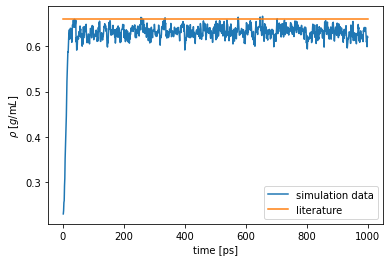

In [21]:
fig, ax = plt.subplots()
ax.set_xlabel(r"time [ps]")
ax.set_ylabel(r"$\rho$ [$g$/m$L$]")
ax.plot(time, rho, label="simulation data")
exp = time*0 + 0.6606
ax.plot(time, exp, label="literature")
ax.legend(loc="best")

We see that after equilibration the density settles close to the estimated density. This forcefield has been calibrated to reproduce density as it is a common liquid and it is easily experimentally accessible.
However, we have some deviations most likely that we have finite size effects with this small example system and also not fully equilibrate the molecular configurations.